# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [ ]:
import datetime
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline 


from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture


In [ ]:
print(datetime.datetime.now())

2021-12-09 11:10:30.111613


In [ ]:
!which python

/usr/local/bin/python


In [ ]:
!python --version

Python 3.7.12


In [ ]:
!echo $PYTHONPATH

/env/python


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline

# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every single posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a winner and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descripive and *help Uncle Steve understand his customers better*. Please!

**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.) 
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any prepropoceesing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.


## 1.0: Load data 

In [ ]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()
print(df1.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB
   Age  Income  SpendingScore       Savings
0   58   77769       0.791329   6559.829923
1   59   81799       0.791082   5417.661426
2   62   74751       0.702657   9258.992965
3   59   74373       0.765680   7346.334504
4   87   17760       0.348778  16869.507130


## 1.1: Preprocessing 

In [ ]:
# Check the number of missing values in the Dataset
df1.isnull().sum().sort_values(ascending = False).head()

Savings          0
SpendingScore    0
Income           0
Age              0
dtype: int64

In [ ]:
df1.shape

(505, 4)

In [ ]:
df1.describe()

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


**Exploratory Data Analysis Visualization**


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


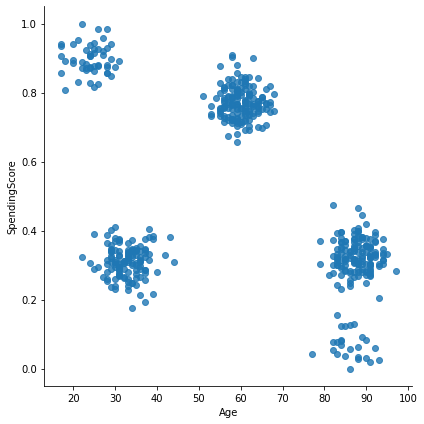

In [ ]:
sns.lmplot(x="Age", y= "SpendingScore", data= df1, fit_reg=False, size=6, aspect=1)

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


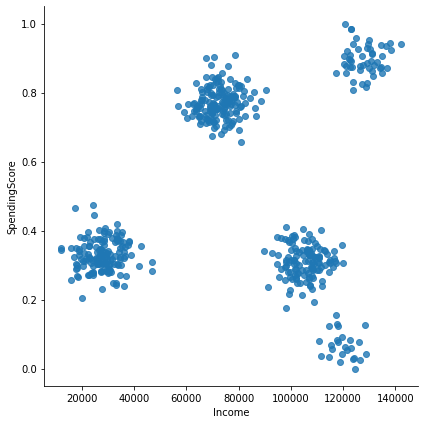

In [ ]:
sns.lmplot(x="Income", y= "SpendingScore", data= df1, fit_reg=False, size=6, aspect=1)

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


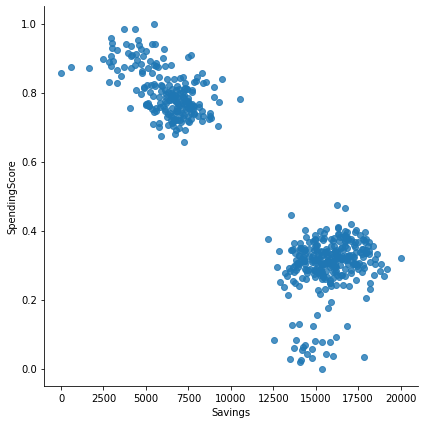

In [ ]:
sns.lmplot(x="Savings", y= "SpendingScore", data= df1, fit_reg=False, size=6, aspect=1)

# Scaling the Data, as the values some features is higher than others

In [ ]:
for col in df1.columns:
  avg = df1[col].mean()
  sd = df1[col].std()
  df1[col] = df1[col].apply(lambda x: (x-avg)/sd)

In [ ]:
df1

,Age,Income,SpendingScore,Savings
0,-0.042245,0.062671,1.102499,-1.071404
1,-0.000820,0.174637,1.101549,-1.302181
2,0.123455,-0.021179,0.760973,-0.526034
3,-0.000820,-0.031681,1.003709,-0.912490
4,1.159078,-1.604574,-0.602022,1.011683
...,...,...,...,...
500,-1.284994,0.713827,-0.453108,0.621171
501,1.407628,-1.544173,-1.162955,1.233978
502,1.283353,-1.117339,-0.577482,0.854466
503,1.324778,-1.523419,-0.579291,1.321142


# Implement K-means

In [ ]:
# Trying with K= 4 as during the EDA, I observed 4 different clusters in one of the graphs
km = KMeans(n_clusters = 4)
df1['cluster'] = km.fit_predict(df1)

In [ ]:
df1.head()

,Age,Income,SpendingScore,Savings,cluster
0,-0.042245,0.062671,1.102499,-1.071404,0
1,-0.000820,0.174637,1.101549,-1.302181,0
2,0.123455,-0.021179,0.760973,-0.526034,0
3,-0.000820,-0.031681,1.003709,-0.912490,0
4,1.159078,-1.604574,-0.602022,1.011683,2


In [ ]:
df1.cluster.value_counts()

0    157
1    151
2    147
3     50
Name: cluster, dtype: int64

In [ ]:
# WCSS == Inertia
km.inertia_

189.32614086171128

In [ ]:
silhouette_score(df1, km.labels_)

0.7930613209998458

Text(0.5, 1.0, 'K-Means (Dot Size = Silhouette Distance)')

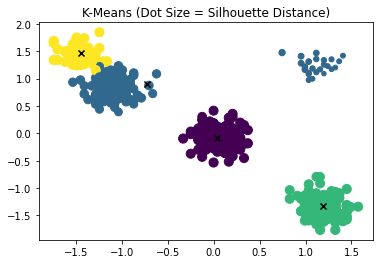

In [ ]:
sample_silhouette_values = silhouette_samples(df1, km.labels_)
sizes = 100*sample_silhouette_values

plt.figure();

plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1], s=sizes, c=km.labels_)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='x', c="black")

plt.title("K-Means (Dot Size = Silhouette Distance)")

# Implmmenting K-Means using Elbow Method

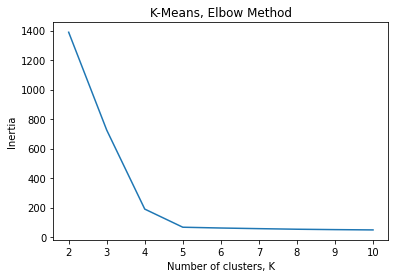

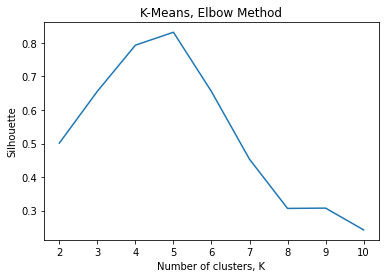

In [ ]:
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df1)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(df1, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

# Implementing K-Means with K=5

In [ ]:
km1 = KMeans(n_clusters = 5)
df1['cluster_K_5'] = km1.fit_predict(df1)


In [ ]:
df1.head()

,Age,Income,SpendingScore,Savings,cluster,cluster_K_5
0,-0.042245,0.062671,1.102499,-1.071404,0,0
1,-0.000820,0.174637,1.101549,-1.302181,0,0
2,0.123455,-0.021179,0.760973,-0.526034,0,0
3,-0.000820,-0.031681,1.003709,-0.912490,0,0
4,1.159078,-1.604574,-0.602022,1.011683,2,1


In [ ]:
km1.inertia_

66.37940857285106

In [ ]:
silhouette_score(df1, km1.labels_)

0.8606338051948379

Text(0.5, 1.0, 'K-Means (Dot Size = Silhouette Distance)')

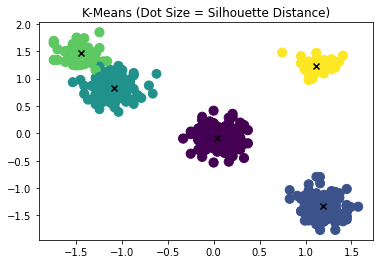

In [ ]:
sample_silhouette_values_k_5 = silhouette_samples(df1, km1.labels_)
sizes = 100*sample_silhouette_values_k_5

plt.figure();

plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1], s=sizes, c=km1.labels_)
plt.scatter(km1.cluster_centers_[:, 0], km1.cluster_centers_[:, 1], marker='x', c="black")

plt.title("K-Means (Dot Size = Silhouette Distance)")

## 1.2: Clustering Algorithm #2 - AgglomerativeClustering (aka Hierarchical)

---



In [ ]:
# DO NOT MODIFY THIS CELL
df_agg = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df_agg.info()
print(df_agg.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB
   Age  Income  SpendingScore       Savings
0   58   77769       0.791329   6559.829923
1   59   81799       0.791082   5417.661426
2   62   74751       0.702657   9258.992965
3   59   74373       0.765680   7346.334504
4   87   17760       0.348778  16869.507130


In [ ]:
col_names = df_agg.columns

# Scaling

In [ ]:
X = df_agg.copy()

scaler = StandardScaler()
X = scaler.fit_transform(X)
X[0:10,]

array([[-4.22871323e-02,  6.27330450e-02,  1.10359261e+00,
        -1.07246676e+00],
       [-8.21109365e-04,  1.74810526e-01,  1.10264136e+00,
        -1.30347264e+00],
       [ 1.23576959e-01, -2.11999168e-02,  7.61727378e-01,
        -5.26555609e-01],
       [-8.21109365e-04, -3.17123951e-02,  1.00470466e+00,
        -9.13394630e-01],
       [ 1.16022753e+00, -1.60616460e+00, -6.02618775e-01,
         1.01268619e+00],
       [-1.24480180e+00,  1.55920380e+00,  1.31835884e+00,
        -1.68414067e+00],
       [-2.08151224e-01,  2.74411535e-02,  1.07995544e+00,
        -1.00793738e+00],
       [ 1.16022753e+00, -9.15567087e-01, -5.77511904e-01,
         1.25878240e+00],
       [ 9.94363441e-01, -1.14383804e+00, -6.95375294e-01,
         5.90762597e-01],
       [ 1.03582946e+00, -1.32992004e+00, -5.32121174e-01,
         1.21697119e+00]])

In [ ]:
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg.fit(X)

AgglomerativeClustering(n_clusters=5)

In [ ]:
agg.labels_

array([1, 1, 1, 1, 0, 3, 1, 0, 0, 0, 4, 2, 2, 2, 1, 4, 1, 0, 0, 4, 2, 4,
       1, 0, 4, 3, 3, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 3, 1,
       1, 3, 4, 3, 2, 1, 0, 2, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 3, 3, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 3, 1, 4, 1, 0, 0, 2, 2, 1,
       1, 1, 1, 1, 3, 0, 1, 3, 2, 1, 1, 2, 2, 3, 2, 3, 2, 0, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 1, 2, 3, 0, 2, 0, 0, 0, 2, 4, 1, 0, 1, 1, 2, 1,
       2, 1, 3, 0, 4, 3, 1, 2, 0, 1, 1, 3, 1, 3, 1, 4, 1, 0, 1, 2, 0, 1,
       0, 4, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 2, 3, 3, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 3, 2,
       0, 0, 0, 2, 1, 2, 1, 2, 1, 0, 3, 1, 0, 0, 0, 0, 1, 0, 2, 3, 2, 0,
       1, 1, 2, 0, 2, 3, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 3, 1,
       1, 1, 4, 1, 2, 0, 3, 3, 3, 0, 1, 2, 0, 0, 2, 2, 1, 1, 4, 1, 1, 0,
       1, 0, 2, 3, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 4, 2, 0,
       0, 2, 4, 0, 0, 3, 1, 2, 2, 1, 2, 0, 0, 2, 1,

In [ ]:
silhouette_score(X, agg.labels_)

0.8048976287755765

Text(0.5, 1.0, 'Agglomerative')

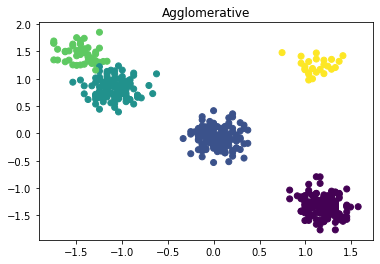

In [ ]:
plt.figure();

plt.scatter(X[:, 0], X[:, 1], c=agg.labels_);
plt.title("Agglomerative")

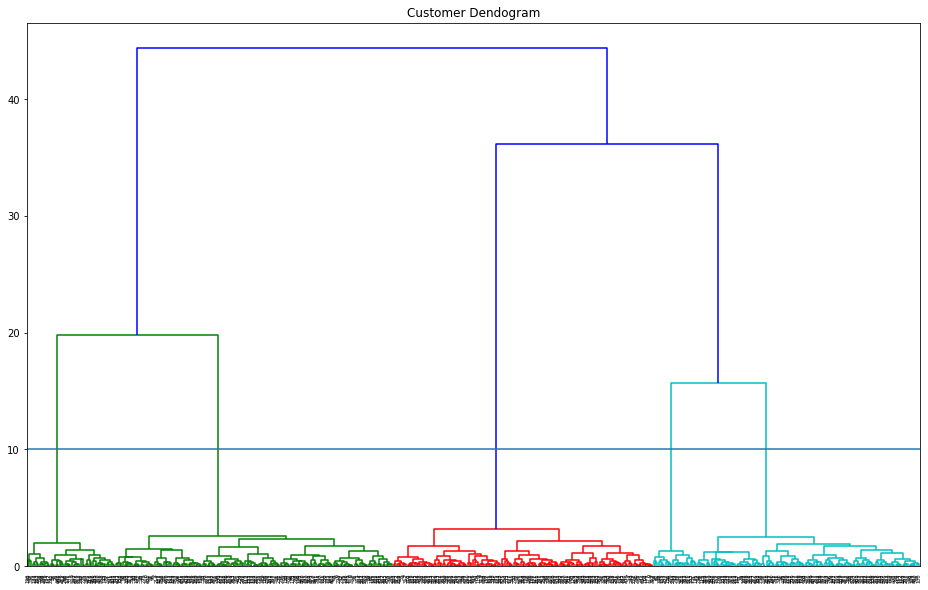

In [ ]:
# max_d = cut-off/ Threshold value
max_d = 10
import scipy.cluster

aggl = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')

# Plot the dendogram
plt.figure(figsize=(16, 10));
plt.grid(False)
plt.title("Customer Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl);

plt.axhline(y=max_d)

In [ ]:
# Let's find K=5 clusters
K=5
labels = scipy.cluster.hierarchy.fcluster(aggl, K, criterion="maxclust")

In [ ]:
df_agg['Cluster ID'] = labels
df_agg.head(9)

,Age,Income,SpendingScore,Savings,Cluster ID
0,58,77769,0.791329,6559.829923,2
1,59,81799,0.791082,5417.661426,2
2,62,74751,0.702657,9258.992965,2
3,59,74373,0.765680,7346.334504,2
4,87,17760,0.348778,16869.507130,3
5,29,131578,0.847034,3535.514352,1
6,54,76500,0.785198,6878.884249,2
7,87,42592,0.355290,18086.287158,3
8,83,34384,0.324719,14783.379086,3


In [ ]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

means = np.zeros((K, X.shape[1]))

for i, label in enumerate(set(labels)):
    means[i,:] = X[labels==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, sum(labels==label)))
    
means


Cluster 1 (n=50):

Cluster 2 (n=157):

Cluster 3 (n=147):

Cluster 4 (n=25):

Cluster 5 (n=126):


array([[-1.44,  1.46,  1.51, -1.57],
       [ 0.04, -0.09,  1.03, -1.01],
       [ 1.19, -1.33, -0.68,  0.97],
       [ 1.12,  1.24, -1.68,  0.6 ],
       [-1.09,  0.83, -0.75,  0.63]])

## 1.3 Model Comparison

K-Means Clustering | Hierarchical Clustering
-------------------|------------------
Easy to implement      | A bit hard to implement
Had to make a guess about the initial value of K | No intial value required
Fast     | Little slow as compared to K-Means, but might be slower on a larger dataset
silhouette_score = 0.86 | silhouette_score = 0.80
There seem to be some overalapping between the clusters | The clusters created are not overalapping and the user has the ability to create more clusters by switching the threshold value 
It is easy to change the  decision by changing number of clusters which impacts the accuracy of the model | The decision could not be reversed as it would not undo the combination of clusters created originally



From my experience, I would say that K-Means is a better algorithm due to the following factors :  


1.   Faster
2.   Easy to implement
3.   Bette Silhouette Score
4.   Decent visualization of the clusters, not as good a the Hierarchical Clustering model though, but the implementation for Hierarchical Clustering seems to be harder that K-Means
5.   Hyperparameter Tuning for K-Means seems to be really easy using the elbow method



## 1.4 Personas

# Relative Importance Graph

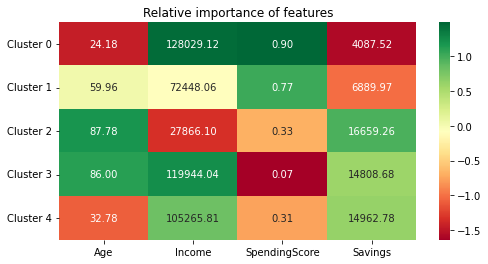

In [ ]:
import seaborn as sns

all_means = X.mean(axis=0)

relative_imp = means - all_means

plt.figure(figsize=(8, 4));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, 
            annot=scaler.inverse_transform(relative_imp), 
            fmt='.2f', 
            cmap='RdYlGn', 
            robust=True, 
            square=False,
            xticklabels=col_names, 
            yticklabels=['Cluster {}'.format(x) for x in range(K)]);
#plt.savefig('out/mall_heatmap.png')

# Examplr

In [ ]:
from scipy.spatial import distance

for i, label in enumerate(set(labels)):
    X_tmp= X
    exemplar_idx = distance.cdist([means[i]], X).argmin()
   
    print('\nCluster {}:'.format(label))
    #print("  Examplar ID: {}".format(exemplar_idx))
    #print("  Label: {}".format(labels[exemplar_idx]))
    #print("  Features:")
    display(df_agg.iloc[[exemplar_idx]])


Cluster 1:


,Age,Income,SpendingScore,Savings,Cluster ID
95,25,130934,0.913766,3942.389134,1



Cluster 2:


,Age,Income,SpendingScore,Savings,Cluster ID
467,61,72027,0.762325,6926.123598,2



Cluster 3:


,Age,Income,SpendingScore,Savings,Cluster ID
335,89,26940,0.326005,16555.159377,3



Cluster 4:


,Age,Income,SpendingScore,Savings,Cluster ID
155,86,115689,0.057843,14803.153273,4



Cluster 5:


,Age,Income,SpendingScore,Savings,Cluster ID
405,34,103204,0.301087,15149.810421,5



*   Persona 1 (Cluster 0) : **Prodigal Millenials** : Earning and spending good amount of money with low savings
*   Persona 2 (Cluster 1) : **YOLO** : With an average age of 60 years still having a considerable high spending score and low savings
*   Persona 3 (Cluster 2) : **Close-fisted seniors** :Really old people with an average age of around 90 years having low income and spending habits, but keen on savings
*   Persona 4 (Cluster 3) : **Uncle Scrooge** : Really old people with one of the highest incomes, but not keen on spending and filling up the vaults (We should launch a campaign to bring these poeple to the store)
*   Persona 5 (Cluster 4) : **Conservative Adults**: Middle aged people with high income and savings, with a comparatively low spending score (It could be a good idea to launch a campaign to attract this segment to the store)

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal componentns).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do? 





## 3.0: Load data and split

In [ ]:
#@title
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


## 3.1: Baseline model

In [ ]:
# Check for NULL values
X_train.isnull().sum()

UserID               0
Sex                  0
PreviousDefault      0
FirstName            0
LastName             0
NumberPets           0
PreviousAccounts     0
ResidenceDuration    0
Street               0
LicensePlate         0
Amount               0
Married              0
Duration             0
City                 0
Purpose              0
DateOfBirth          0
dtype: int64

In [ ]:
# creating a custom function to change DateOfBirth to Age for better calculations

from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

X_train['DateOfBirth'] = pd.to_datetime(X_train['DateOfBirth'], errors='coerce')
X_train['Age'] = X_train['DateOfBirth'].apply(calculate_age)

In [ ]:
# one hot encoding the feature Purpose
X_train = pd.concat([X_train, pd.get_dummies(X_train['Purpose'], prefix='Purpose')], axis=1)
X_train.head()

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth,Age,Purpose_Business,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation
3897,236-22-6766,M,0,Jerry,Black,2,0,2,0466 Brown Wall,3-U8282,3329,0,12,New Roberttown,Household,1970-04-22,51,0,0,1,0,0,0,0,0
5628,766-20-5986,F,0,Julia,Jones,0,2,2,6095 Larson Causeway,LWO 912,2996,0,36,Ericmouth,Household,1964-06-19,57,0,0,1,0,0,0,0,0
1756,744-25-5747,F,0,Abigail,Estrada,2,0,3,293 Michael Divide,715 OQT,2470,0,24,East Jill,NewCar,1975-02-17,46,0,0,0,1,0,0,0,0
2346,463-78-3098,F,0,Jessica,Jones,2,1,2,02759 Williams Roads,869 SYK,3745,0,30,Lake Debra,UsedCar,1977-02-16,44,0,0,0,0,0,0,1,0
2996,414-44-6527,M,0,William,Shaffer,0,1,3,19797 Turner Rue,48-A601,3549,0,36,North Judithbury,Vacation,1976-07-27,45,0,0,0,0,0,0,0,1


In [ ]:
# removing unnecessary features
X_train.drop([ 'UserID', 'FirstName', 'LastName', 'Street', 'LicensePlate', 'City', 'DateOfBirth', 'Purpose', 'NumberPets'],axis=1, inplace=True)
X_train.head()

,Sex,PreviousDefault,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Age,Purpose_Business,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation
3897,M,0,0,2,3329,0,12,51,0,0,1,0,0,0,0,0
5628,F,0,2,2,2996,0,36,57,0,0,1,0,0,0,0,0
1756,F,0,0,3,2470,0,24,46,0,0,0,1,0,0,0,0
2346,F,0,1,2,3745,0,30,44,0,0,0,0,0,0,1,0
2996,M,0,1,3,3549,0,36,45,0,0,0,0,0,0,0,1


In [ ]:
# Label encoding "Sex" column
X_train['Sex'] = X_train['Sex'].map( {'M':1, 'F':0} )
X_train.head()

,Sex,PreviousDefault,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Age,Purpose_Business,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation
3897,1,0,0,2,3329,0,12,51,0,0,1,0,0,0,0,0
5628,0,0,2,2,2996,0,36,57,0,0,1,0,0,0,0,0
1756,0,0,0,3,2470,0,24,46,0,0,0,1,0,0,0,0
2346,0,0,1,2,3745,0,30,44,0,0,0,0,0,0,1,0
2996,1,0,1,3,3549,0,36,45,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

clf_rf = RandomForestClassifier(
    n_estimators=100, max_depth=None)
clf_rf.fit(X_train, y_train)


scores = cross_val_score(clf_rf, X_train, y_train, cv=7, scoring='f1_macro')

scores
print("F1: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


F1: 0.77 (+/- 0.05)


## 3.2: Feature engineering

In [ ]:
# Balancing Dataset
# number of 1's and 0's in Y_train
print(df3.BadCredit[df3.BadCredit==0].count())
print(df3.BadCredit[df3.BadCredit==1].count())

4967
1033


In [ ]:
import imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [ ]:
# Scaling
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
X_train = rb.fit_transform(X_train)

In [ ]:
X_train = pd.DataFrame(data= X_train, columns = [	'Sex'	,'PreviousDefault',	'PreviousAccounts',	'ResidenceDuration',	'Amount',	'Married',	'Duration',	'Age', 'Purpose_Business',	'Purpose_Education',	'Purpose_Household',	'Purpose_NewCar',	'Purpose_Other',	'Purpose_Repair',	'Purpose_UsedCar',	'Purpose_Vacation'])


In [ ]:
X_train.describe()

,Sex,PreviousDefault,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Age,Purpose_Business,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation
count,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000
mean,0.225101,0.012198,-0.118838,-0.096391,-0.079721,0.393863,0.050155,-0.008803,0.008803,0.034205,0.063255,0.227616,0.101358,0.045397,0.162223,0.045272
std,0.417675,0.109777,0.926333,0.652276,0.719836,0.488636,0.747143,0.696523,0.093415,0.181767,0.243436,0.419320,0.301821,0.208187,0.368679,0.207912
min,0.000000,0.000000,-1.000000,-1.000000,-2.813993,0.000000,-1.500000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-1.000000,-0.500000,-0.556314,0.000000,-0.500000,-0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.500000,0.443686,1.000000,0.500000,0.444444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,5.000000,3.500000,2.005119,1.000000,1.000000,2.333333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


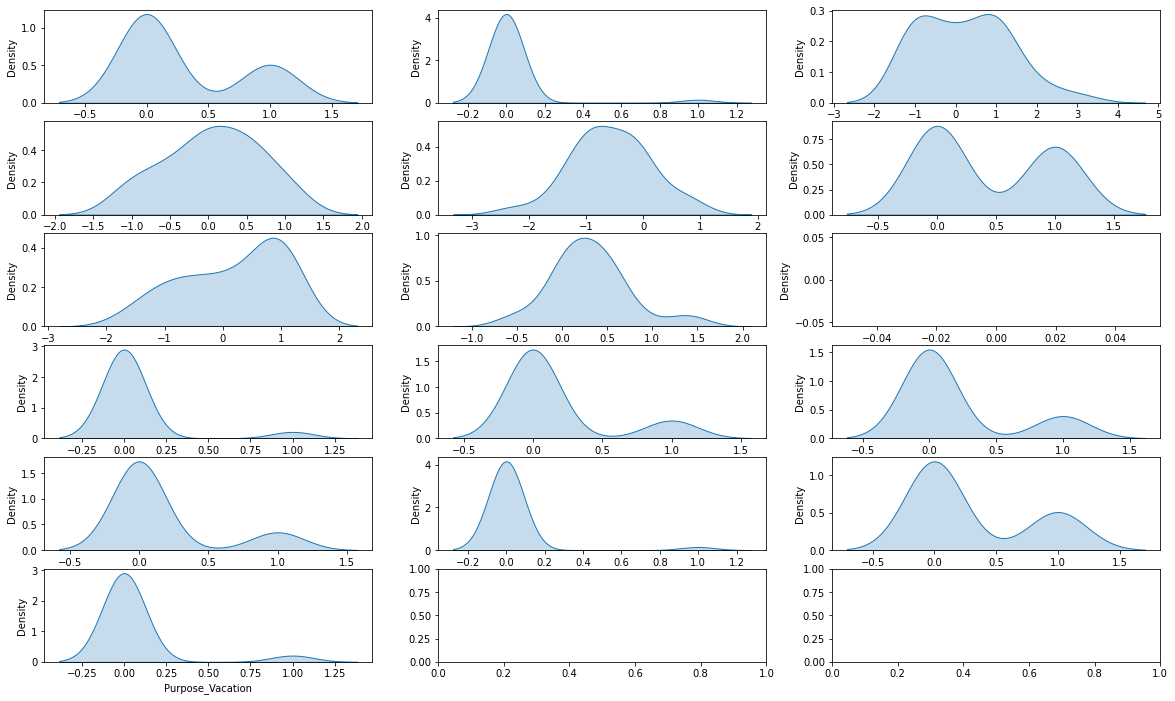

In [ ]:
fig, axes = plt.subplots(6,3, figsize=(20, 12))
axes = axes.flatten()

for ax,i in zip(axes,X_train.iloc[:30].columns):
    sns.kdeplot(data= X_train.iloc[:30][i], ax=ax, fill=True,warn_singular=False)
plt.show()

Most fo the features are looking Normal, hence we dont need to perform any additional transformations on individual features

In [ ]:


clf_rf1 = RandomForestClassifier(
    n_estimators=100, max_depth=None)
clf_rf1.fit(X_train, y_train)


scores1 = cross_val_score(clf_rf1, X_train, y_train, cv=7, scoring='f1_macro')

scores1
print("F1: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))

F1: 0.91 (+/- 0.13)


# Comparison of Step 1 and  Step 2

## Enhancements in Step 2


*   F1 Score increase from **0.76** to **0.91**
*   Balancing the Dataset using **SMOTE** helped increasing the F1 
*   Scaling using Robust Scaler helped, as it took care of the outliers and also helped in normalizing most of the features (I guess Log Transformations could have also helped)
*   Binning the "Age" Variable helped, but it was gave a mean F1 score of **0.89**, hence I dropped it





## 3.3: Feature selection

## Using Information gain - mutual information in Classification

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.02, 0.01, 0.02, 0.02, 0.27, 0.03, 0.15, 0.25, 0.  , 0.01, 0.01,
       0.02, 0.02, 0.01, 0.01, 0.01])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Amount               0.271253
Age                  0.253579
Duration             0.150979
Married              0.026893
PreviousAccounts     0.024574
Purpose_Other        0.017429
Purpose_NewCar       0.016684
Sex                  0.015305
ResidenceDuration    0.015113
PreviousDefault      0.013400
Purpose_Vacation     0.012244
Purpose_UsedCar      0.010358
Purpose_Education    0.009605
Purpose_Household    0.008943
Purpose_Repair       0.007484
Purpose_Business     0.000000
dtype: float64

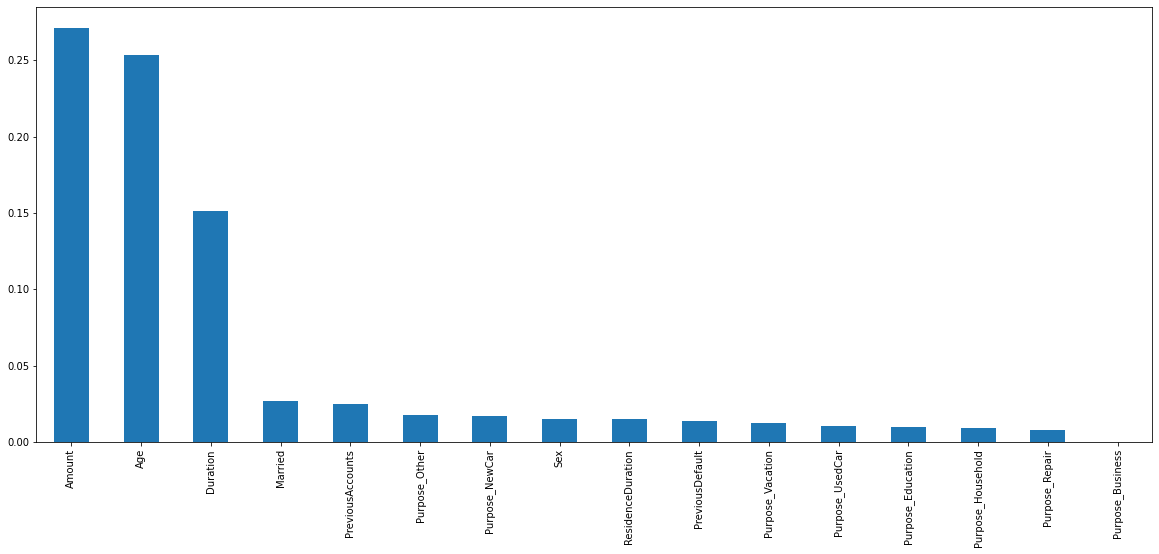

In [ ]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
X_train_SelectedFeatures = X_train[["Amount", "Age", "Duration", "Married"]]

In [ ]:
clf_rf2 = RandomForestClassifier(
    n_estimators=100, max_depth=None)
clf_rf2.fit(X_train_SelectedFeatures, y_train)


scores2 = cross_val_score(clf_rf2, X_train_SelectedFeatures, y_train, cv=10, scoring='f1_macro')

scores2
print("F1: %0.2f (+/- %0.2f)" % (scores2.mean(), scores1.std() * 2))

F1: 0.90 (+/- 0.13)


## Feature Selection using Correlation

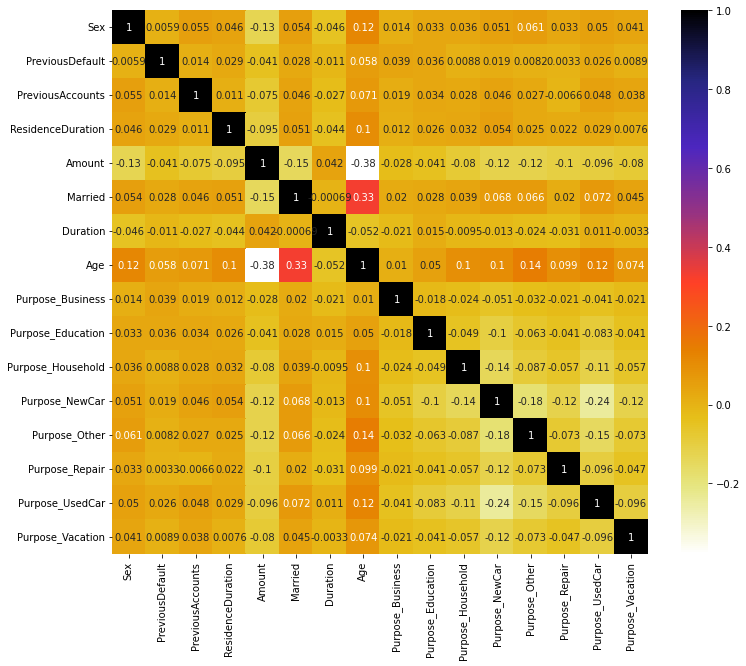

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.5)
len(set(corr_features))

0

Not continuing with this approach because there seem to be no feature highly correlated.

# Comparison of Step 2 and  Step 3

## No Enhancements observed after the Feature Selection Task in Step 3, probably becuase there's already not a lot features available in the X_train Dataset to drop


*   F1 Score dropped from **0.91** to **0.90**
*   I used 2 approaches for feature selection:
1. **Using Information gain - mutual information in Classification**
2. **Using Correlation**
*   mutual information in Classification showed that there were only around 4 main features driving the accuracy of the model, which was right, but it did drop the F1 score by 1%
*   Correlation did not give any results as no two features seem to be correlated, hence I did not use it for my analysis.
*   Reducing the Correlation threshold to a very low value, I found that "Age" might have some correlation, but when I tried removing Age from the selected features and re-run the model, the F1 score dropped by 6%, therefore I did not take out the "Age" feature from X_train





## 3.4: Hyperparameter tuning

In [ ]:
pip install optuna

     |████████████████████████████████| 308 kB 5.1 MB/s 
     |████████████████████████████████| 80 kB 10.9 MB/s 
     |████████████████████████████████| 209 kB 60.2 MB/s 
     |████████████████████████████████| 75 kB 4.8 MB/s 
     |████████████████████████████████| 112 kB 59.1 MB/s 
     |████████████████████████████████| 49 kB 6.7 MB/s 
     |████████████████████████████████| 149 kB 58.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=e2cad19d15dc76facb9369409a1fa04144398bc5ddfe386b24c03c81accfe22e
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna
import sklearn.svm
def objective(trial):

    classifier = trial.suggest_categorical('classifier', ['RandomForest'])
    
    if classifier == 'RandomForest':
        criterion = trial.suggest_categorical('criterion',['entropy', 'gini'])
        n_estimators = trial.suggest_int('n_estimators', 200, 2000,10)
        max_depth = int(trial.suggest_float('max_depth', 10, 100, log=True))
        bootstrap = trial.suggest_categorical('bootstrap',['True','False'])
        max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt','log2'])
        max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)  
    


        clf = sklearn.ensemble.RandomForestClassifier(criterion = criterion,bootstrap = bootstrap,max_features = max_features, 
                                 max_leaf_nodes = max_leaf_nodes, max_depth = max_depth,n_estimators = n_estimators)
  

    return sklearn.model_selection.cross_val_score(
        clf,X_train,y_train, n_jobs=-1, cv=7).mean()

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-12-09 14:55:31,217] A new study created in memory with name: no-name-a7696afc-3b7b-4ffc-af5a-2b0f0a5fc742
[I 2021-12-09 14:55:47,390] Trial 0 finished with value: 0.9074446680080482 and parameters: {'classifier': 'RandomForest', 'criterion': 'entropy', 'n_estimators': 430, 'max_depth': 15.712646322926524, 'bootstrap': 'True', 'max_features': 'auto', 'max_leaf_nodes': 206}. Best is trial 0 with value: 0.9074446680080482.
[I 2021-12-09 14:55:54,626] Trial 1 finished with value: 0.9128521126760563 and parameters: {'classifier': 'RandomForest', 'criterion': 'gini', 'n_estimators': 200, 'max_depth': 48.28059442620199, 'bootstrap': 'False', 'max_features': 'log2', 'max_leaf_nodes': 782}. Best is trial 1 with value: 0.9128521126760563.
[I 2021-12-09 14:56:12,534] Trial 2 finished with value: 0.9133551307847083 and parameters: {'classifier': 'RandomForest', 'criterion': 'entropy', 'n_estimators': 420, 'max_depth': 30.74646810025177, 'bootstrap': 'True', 'max_features': 'auto', 'max_lea

Accuracy: 0.9159959758551308
Best hyperparameters: {'classifier': 'RandomForest', 'criterion': 'entropy', 'n_estimators': 1570, 'max_depth': 30.235252638494895, 'bootstrap': 'True', 'max_features': 'sqrt', 'max_leaf_nodes': 3412}


In [ ]:
study.best_params

{'bootstrap': 'True',
 'classifier': 'RandomForest',
 'criterion': 'entropy',
 'max_depth': 30.235252638494895,
 'max_features': 'sqrt',
 'max_leaf_nodes': 3412,
 'n_estimators': 1570}

In [ ]:
# Running model with the Best Parameters provided by Optuna
clf_rf3 = RandomForestClassifier(
    n_estimators=1570,max_depth=30, max_features='sqrt', max_leaf_nodes=3412, criterion = 'entropy' )

clf_rf3.fit(X_train, y_train) # using full X_train dataset as the feature seection did not provide any promising results


scores3 = cross_val_score(clf_rf3, X_train, y_train, cv=10, scoring='f1_macro')

scores3
print("F1: %0.2f (+/- %0.2f)" % (scores3.mean(), scores1.std() * 2))

F1: 0.92 (+/- 0.13)


# Using another Hyperparameter Optimization Method : Bayesian Optimization

In [ ]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
    }

In [ ]:
def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 10).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 100,
            trials= trials)
best

100%|██████████| 100/100 [44:03<00:00, 26.43s/it, best loss: -0.8919932998324958]


{'criterion': 0,
 'max_depth': 800.0,
 'max_features': 3,
 'min_samples_leaf': 0.002580685221621394,
 'min_samples_split': 0.006653579816332363,
 'n_estimators': 3}

In [ ]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200,5:1300,6:1500}


print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])

entropy
None
750


In [ ]:

# Running model with the Best Parameters provided by Bayesian Optimization
clf_rf4 = RandomForestClassifier(criterion = crit[best['criterion']], max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']])
clf_rf4.fit(X_train, y_train)


scores4 = cross_val_score(clf_rf4, X_train, y_train, cv=10, scoring='f1_macro')

scores4
print("F1: %0.2f (+/- %0.2f)" % (scores4.mean(), scores1.std() * 2))

F1: 0.89 (+/- 0.13)


# Comparison of Step 3 and  Step 4

## 1% enhancement in F1 Score observed by using Optuna


*   F1 Score increased from **0.91** to **0.92**
*   I used 2 approaches for Hyper Parameter Optimization:
1. **Optuna**
2. **Bayesian Optimization**
*   Optuna increased the mean F1 Score by 1%
*   Bayesian Optimization did not bring any enhancements to the model



## 3.5: Performance estimation

In [ ]:
#Transforming X_test by performing all the Preprocessing steps applied on X_train

X_test['DateOfBirth'] = pd.to_datetime(X_test['DateOfBirth'], errors='coerce')
X_test['Age'] = X_test['DateOfBirth'].apply(calculate_age)

In [ ]:
# one hot encoding the feature Purpose
X_test = pd.concat([X_test, pd.get_dummies(X_test['Purpose'], prefix='Purpose')], axis=1)

In [ ]:
# removing unnecessary features
X_test.drop([ 'UserID', 'FirstName', 'LastName', 'Street', 'LicensePlate', 'City', 'DateOfBirth', 'Purpose', 'NumberPets'],axis=1, inplace=True)

In [ ]:
# Label encoding "Sex" column
X_test['Sex'] = X_test['Sex'].map( {'M':1, 'F':0} )

In [ ]:
# Scaling
X_test = rb.fit_transform(X_test)

In [ ]:
X_test = pd.DataFrame(data= X_test, columns = [	'Sex'	,'PreviousDefault',	'PreviousAccounts',	'ResidenceDuration',	'Amount',	'Married',	'Duration',	'Age', 'Purpose_Business',	'Purpose_Education',	'Purpose_Household',	'Purpose_NewCar',	'Purpose_Other',	'Purpose_Repair',	'Purpose_UsedCar',	'Purpose_Vacation'])


In [ ]:
# Making the final Predictions using the model provided by Optuna

y_pred_dt = clf_rf3.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# confusion matrix
matrix = confusion_matrix(y_test,y_pred_dt, labels=[1,0])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[184  25]
 [236 755]]


In [ ]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_pred_dt,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.44      0.88      0.59       209
           0       0.97      0.76      0.85       991

    accuracy                           0.78      1200
   macro avg       0.70      0.82      0.72      1200
weighted avg       0.88      0.78      0.81      1200



## How well did we do?


1.   Looking at the Confusion Matrix, the number of False Postives and False Negatives is pretty less than True Postives and True negatives respectively, which might be a good thing in this case, as you wouldnt want to give someone a credit card with Bad Credit. 
2.   Even though you might be missing on some customers, but it would save you from the risk from bad customers defaulting the credit card payments




# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000. 

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations. 

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing. 
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



**Question**:  How much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs : 
  **5120000**


**Question**: Use the information provided above to create a cost matrix.
 
 **Confusion matrix for the RANDOM FORESTS** :  

|         | Predicted Fail           | Predicted No Fail  |        
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

                                                                COST

|         | Predicted Fail           | Predicted No Fail  |     
| ------------- |------------| -----:|
| **Actual Fail**      | 2500 | 20000 |
| **Actual No Fail**   | 500 | 0 |


                                                               TOTAL COST
|         | Predicted Fail           | Predicted No Fail  |    
| ------------- |------------| -----:|
| **Actual Fail**      | 502000 | 1100000 |
| **Actual No Fail**   | 25000 | 0 |

Total Cost Using RANDOM FORESTS= 502000 + 1100000 + 2500 = **1627500**

#######################################################################################################

**Confusion matrix for the RNN:**


|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |

                                                                COST

|         | Predicted Fail           | Predicted No Fail  |     
| ------------- |------------| -----:|
| **Actual Fail**      | 2500 | 20000 |
| **Actual No Fail**   | 500 | 0 |


                                                               TOTAL COST
|         | Predicted Fail           | Predicted No Fail  |    
| ------------- |------------| -----:|
| **Actual Fail**      | 565000 | 600000 |
| **Actual No Fail**   | 600000 | 0 |

Total Cost Using RNN = 565000 + 600000 + 600000 = **1765000**

#######################################################################################################

**Using NO Predictive Models:**


|         |  Fail           |  |
| ------------- |------------| -----:|
| **Actual Fail**      | 256  |
| **Actual No Fail**   | 255245 |

Cost of Fixing after Actual Failure = 256 * 20000 = **5120000**

#######################################################################################################

Which model will save Uncle Steve more money? Justify.

Random Forests would save Uncle Steve more money. It is a little better than RNN because it predicts the larger number of True Negatives, hence saving more in the maintainance costs. Also, the